In [3]:
# Heart Disease Pridiction using Machine Learning

#This notebook exproles patient data to predict the presence of heart disease using various supervised machine learning models.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
# load the dataset
df = pd.read_csv("..\data\heart_dataset.csv")
df.head()

<>:2: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:2: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
C:\Users\Admin\AppData\Local\Temp\ipykernel_9044\3981124521.py:2: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  df = pd.read_csv("..\data\heart_dataset.csv")


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.shape

(1025, 14)

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


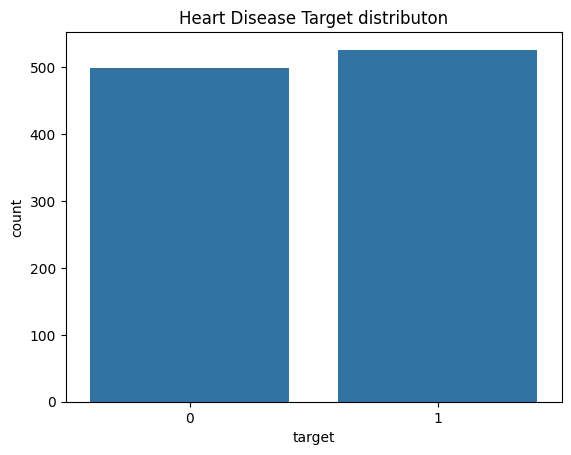

In [8]:
sns.countplot(x="target", data=df)
plt.title("Heart Disease Target distributon")
plt.show();

In [9]:
# Has we got a slightly more target 1 than target 0, but dataset that we have is pretty much balanced dataset.
# now we know that our target column is balanced, let's see how the other columns are distributed.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


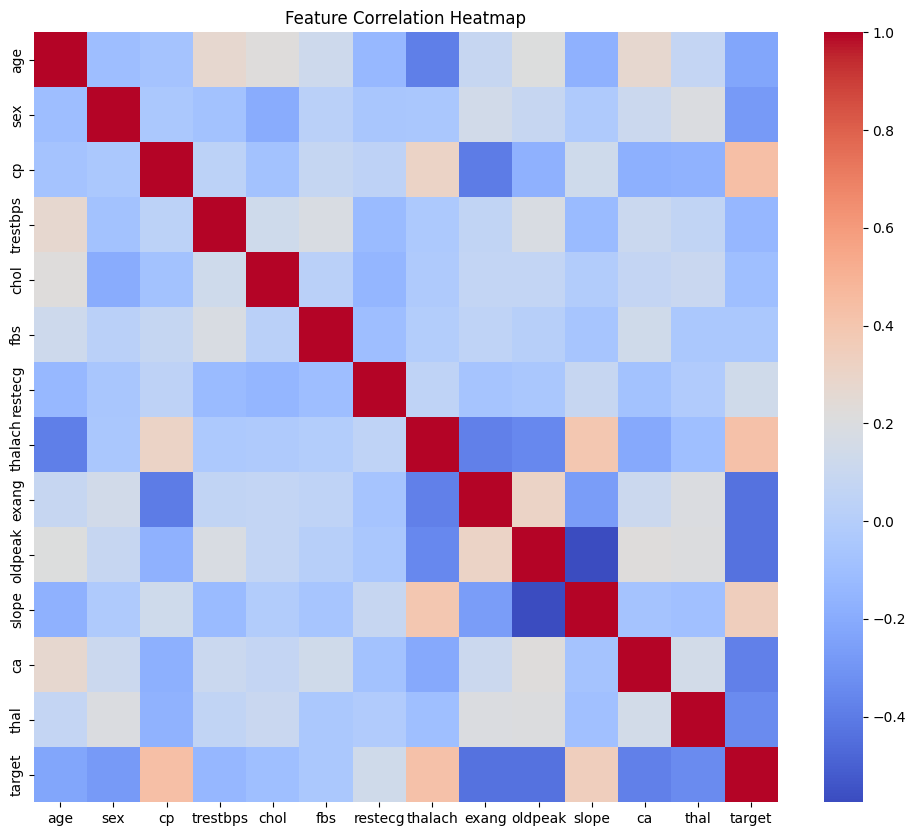

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show();

In [11]:
# Feature splitting
X = df.drop("target", axis=1)
Y = df["target"]

In [12]:
# spllitting the test and train dataset
X_train, X_test, Y_train,Y_test =train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((820, 13), (205, 13), (820,), (205,))

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train_scaled, Y_train)

Y_pred_lr = lr.predict(X_test_scaled)

print("The Accuracy of Logistic Regression", accuracy_score(Y_test, Y_pred_lr))
print("Classification Report for Logistic Regression: \n", classification_report(Y_test, Y_pred_lr))

The Accuracy of Logistic Regression 0.7951219512195122
Classification Report for Logistic Regression: 
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [15]:
rf  = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
print("the Accuracy of Random Forest Classifier:", accuracy_score(Y_test, Y_pred_rf))
print("Classification Report for Random Forest Classifier:\n", classification_report(Y_test, Y_pred_rf))

the Accuracy of Random Forest Classifier: 0.9853658536585366
Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



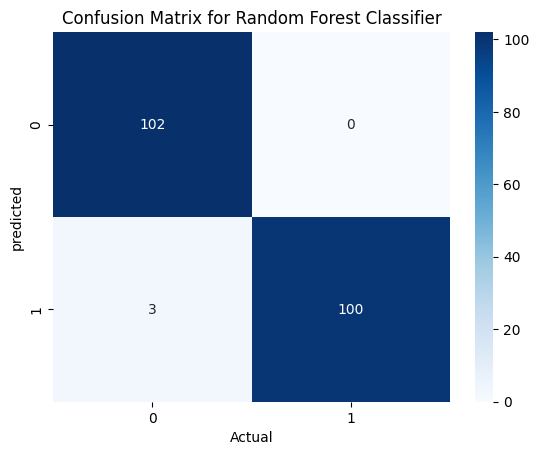

In [17]:
cm = confusion_matrix(Y_test, Y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show();